# Binary stars evolutions and binary black holes

Giacomo Menegatti, Dario Puggioni, Laura Schulze, Savina Tsichli

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


## Loading the dataset
The dataset is divided in files depending on the CE efficiency $ \alpha $ and the metallicity $ Z $ of the two stars. All the data are loaded into a pandas dataframe containing also the two parameters.


In [3]:

alpha = [0.5, 1, 3, 5] # CE efficiency
Z = [2e-4, 4e-4, 8e-4, 1.2e-3, 1.6e-3, 2e-3, 4e-3, 6e-3, 8e-3, 1.2e-2, 1.6e-2, 2e-2]  #Metallicity value

data = [] #Data list 

sim_data = pd.DataFrame({'alpha':[], 'Z':[], 'MtotZAMS':[], 'num_mergers':[]})
#Appending all the values in a single big dataframe

index = 0
for a in alpha:
  for m in Z:
    # The simulation data first row contains the MtotZAMS and the number of merger for each alpha and metallicity 
    df = pd.read_csv(f'stable_MT_vs_CE/A{a}/MTCE_BBHs_{m}.txt', sep=' ', nrows = 1, header=0) 
    sim_data.loc[index] = [a, m, df.iloc[0,0], df.iloc[0,1]]  #Adding the row to the sim_data df
    index = index + 1 

    df = pd.read_csv(f'stable_MT_vs_CE/A{a}/MTCE_BBHs_{m}.txt', header=2, sep= ' ')     # Simulation data
    df['alpha'],df['Z'] = a, m                                 #Adding the alpha and Z paramtere in the table
    
    data.append(df)

data = pd.concat(data)
data.columns = [name[name.find(':')+1:] for name in data.columns] #The data header are col.i: this deletes the first part
print('Data columns: \n ', data.columns.values)


Data columns: 
  ['ID' 'm1ZAMS/Msun' 'm2ZAMS/Msun' 'm1rem/Msun' 'm2rem/Msun'
 'm1rem+m2rem/Msun' 'delay_time/Myr' 'sma/Rsun' 'ecc' 'kick/kms'
 'kick/kms' 'cmu1' 'cmu2' 'v1x/kms' 'v1y/kms' 'v1z/kms' 'v2x/kms'
 'v2y/kms' 'v2z/kms' 'time_SN1/Myr' 'time_SN2/Myr' 'CE' 'alpha' 'Z']


In [4]:
CE_data = data.query('CE == True')
MT_data = data.query('CE == False')


print(f'There are {CE_data.shape[0]} BBHs evolving from common envelope, and {MT_data.shape[0]} BBHs evolving from mass transfer')


There are 2551001 BBHs evolving from common envelope, and 412581 BBHs evolving from mass transfer


<Axes: xlabel='m1rem/Msun', ylabel='m2rem/Msun'>

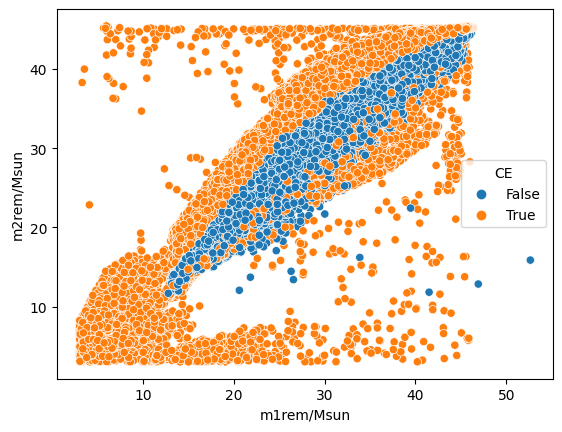

In [7]:
sns.scatterplot(data.query('alpha==0.5 and Z == 2e-4'), x='m1rem/Msun', y='m2rem/Msun', hue = 'CE', markers='.')

